# Judging a book by it's cover

<i> Websites like amazon, flipkart, alibaba, ebay recieve thousands of new entrants in form of books. To see each of these books manually and label them is a tedious and strenuous task. Thanks to techniques like Computer Vision and AI manual work can now be completely eradicated and we can achive this with a modicum of effort.</i>


Here in this project we have taken a dataset of 5 different genres of book from Amazon. The genres are Arts&Photography, Cookbooks, History, Law and Science. The dataset is in the following structure

The folder Image has 3 folders train, test and validation and each of these folders contain 5 folders each corresponding to a category. There are 800 images of each category for training, 180 for validation and 20 for testing.

Now we will discuss the Convnet architecture that has been used by us and how it extracts features from a single image.
  

The structure that has been used by us is <b> VGG16 </b> Its architecture is as follows:

<img src = "transfer-learning-and-fine-tuning-for-cross-domain-image-classification-with-keras-9-638.jpg">

Now we will elaborate upon the effect of such a structure when a single image is passed through it

In [2]:
#Import Required Libraries
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have used the concept of <b> Transfer Learning </b> and tweaked the basic architecture a bit to get our desired result.

In [20]:
# Using a pre_trained model. The model has been trained on imagenet.
vgg16_model = VGG16(weights='imagenet', include_top=True)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
vgg16_model.compile(optimizer=sgd, loss='categorical_crossentropy')
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

As you can see above the input layer expects an 224*224 image. So we resize the input image and the image after resizing is shown below

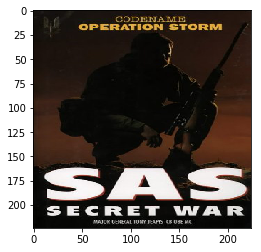

In [21]:
lena = image.load_img("test.jpg", target_size=(224, 224))
plt.imshow(lena)
lena = image.img_to_array(lena)
lena = np.expand_dims(lena, axis=0)
lena = preprocess_input(lena)

In [8]:
model = Model(input=vgg16_model.input, 
              output=vgg16_model.get_layer('block1_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

block1_pool_features = model.predict(lena)
block1_pool_features.shape

/home/ironstark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


(1, 112, 112, 64)

The various features obtained by the various layers of the model are depicted below. As you can see each image (pool) highlights certain features and at the same time brings about a change in dimension of image while preserving the features to facilitate faster processing.

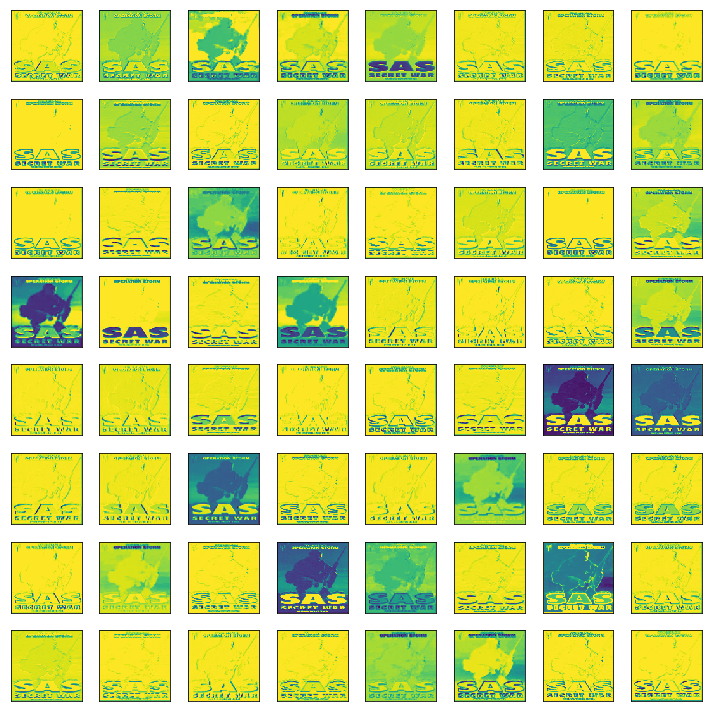

In [22]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
axes = np.ravel(axes)
for i in range(block1_pool_features.shape[3]):
    axes[i].imshow(255-block1_pool_features[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [23]:
model = Model(input=vgg16_model.input, 
              output=vgg16_model.get_layer('block2_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

block2_pool_features = model.predict(lena)
block2_pool_features.shape

/home/ironstark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


(1, 56, 56, 128)

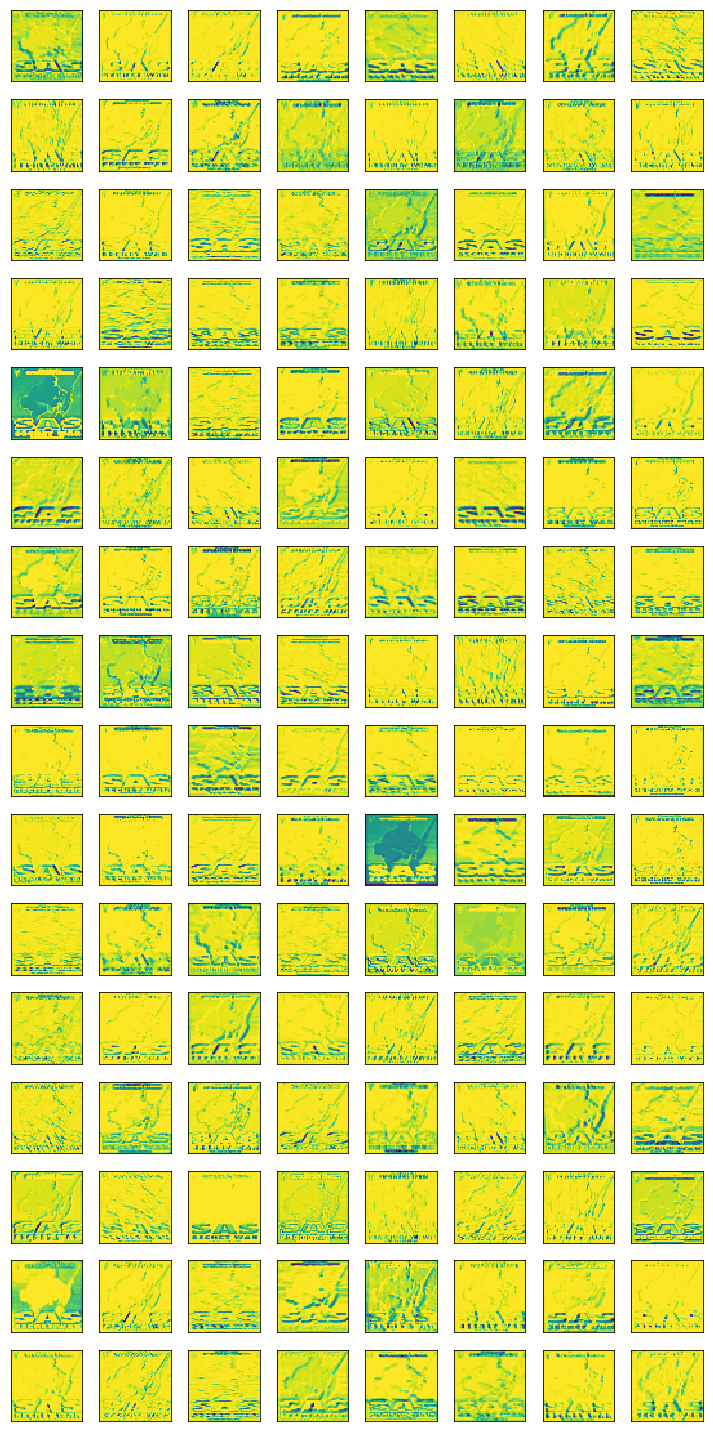

In [24]:
fig, axes = plt.subplots(16, 8, figsize=(10, 20))
axes = np.ravel(axes)
for i in range(block2_pool_features.shape[3]):
    axes[i].imshow(255-block2_pool_features[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()


In [12]:
W_b1c1 = vgg16_model.layers[1].get_weights()[0]
print(W_b1c1.shape)


(3, 3, 3, 64)


Now that we have visualized the outputs, let's visualize the weights learned.

In [25]:
def visualize_weights(W, rows, cols):
    Wr = np.reshape(W, (W.shape[0], W.shape[1], 1, W.shape[2]*W.shape[3]))
    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
    axes = np.ravel(axes)
    imax = min(Wr.shape[3], rows * cols)
    for i in range(imax):
        w = Wr[:, :, 0, i]
        axes[i].imshow(w, interpolation="nearest", cmap="coolwarm")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

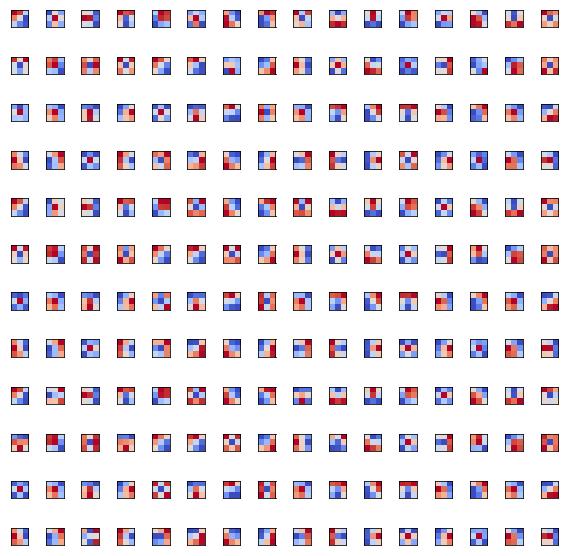

In [26]:
visualize_weights(W_b1c1, 12, 16)

In [27]:
W_b2c1 = vgg16_model.layers[4].get_weights()[0]
print(W_b2c1.shape)

(3, 3, 64, 128)


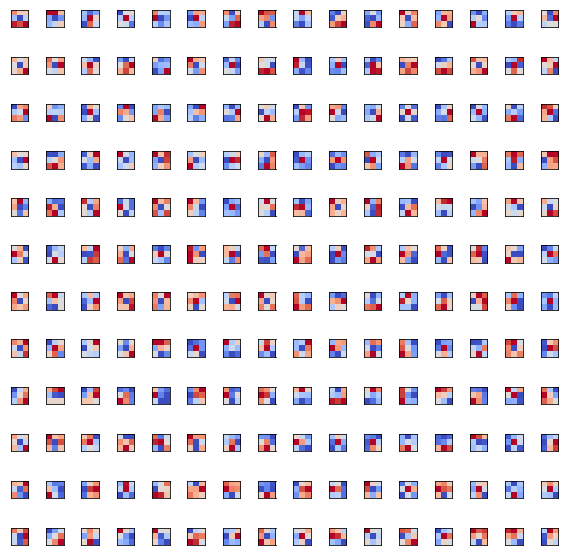

In [28]:
visualize_weights(W_b2c1, 12, 16)   # show the first 128 of 8,192 filters

In [17]:
W_b5c1 = vgg16_model.layers[15].get_weights()[0]
print(W_b5c1.shape)

(3, 3, 512, 512)


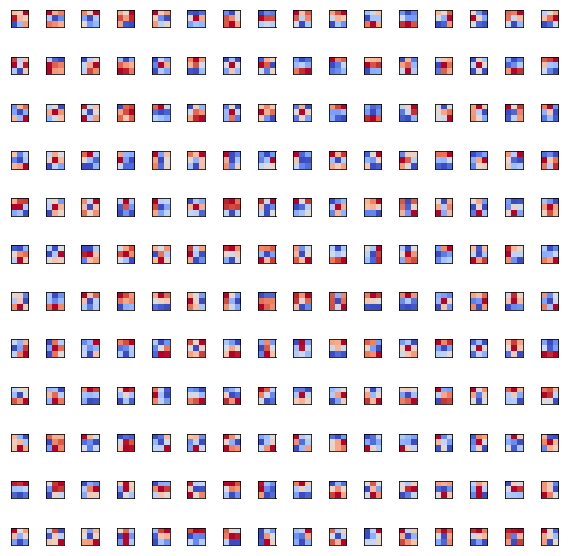

In [29]:
visualize_weights(W_b5c1, 12, 16)  # show first 128 of 262,144 filters

Let us now come to the cool and fun part. Training, Validation and Testing. The bottleneck features part has been commented out because we need to train that only once and then when we have the results on our system we can store it and use them again. Which is a relief coz it takes a lot of time to train.


We ran the thing in the train_top_model for epochs ranging from 20 to 180 and for batch size ranging from 2000 to 200. The following results were obtained

<img src = "20epochs2000.png">

For 20 epochs and 2000 batch size

<img src = "40epochs.png">

For 40 epochs 1900 batch size

<img src = "60epochs.png">

For 60 epochs and 1800 batch size

<img src = "80epochs.png">

For 80 epochs 1700 batch size

<img src = "100epochs.png">

For 100 epochs and 1600 batch size

<img src = "120epochs.png">

For 120 epochs 1500 batch size

<img src = "140epochs.png">

For 140 epochs and 1400 batch size

<img src = "160epochs.png">

For 160 epochs 1300 batch size

<img src = "180epochs.png">

For 180 epochs and 1200 batch size

As you can see 100 epochs along with 1600 batch size gave the best result.

Found 4000 images belonging to 5 classes.
Found 900 images belonging to 5 classes.
Train on 4000 samples, validate on 900 samples
Epoch 1/100
4000/4000 [==============================] - 3s - loss: 1.6932 - acc: 0.2065 - val_loss: 1.6072 - val_acc: 0.2089
Epoch 2/100
4000/4000 [==============================] - 3s - loss: 1.6154 - acc: 0.2040 - val_loss: 1.6008 - val_acc: 0.2344
Epoch 3/100
4000/4000 [==============================] - 3s - loss: 1.6049 - acc: 0.2337 - val_loss: 1.5971 - val_acc: 0.2800
Epoch 4/100
4000/4000 [==============================] - 3s - loss: 1.5987 - acc: 0.2410 - val_loss: 1.5920 - val_acc: 0.2789
Epoch 5/100
4000/4000 [==============================] - 2s - loss: 1.5931 - acc: 0.2520 - val_loss: 1.5840 - val_acc: 0.2789
Epoch 6/100
4000/4000 [==============================] - 3s - loss: 1.5895 - acc: 0.2490 - val_loss: 1.5735 - val_acc: 0.2944
Epoch 7/100
4000/4000 [==============================] - 3s - loss: 1.5781 - acc: 0.2685 - val_loss: 1.5623 - val_

4000/4000 [==============================] - 3s - loss: 1.3266 - acc: 0.4470 - val_loss: 1.3780 - val_acc: 0.4300
Epoch 65/100
4000/4000 [==============================] - 3s - loss: 1.3139 - acc: 0.4625 - val_loss: 1.3645 - val_acc: 0.4378
Epoch 66/100
4000/4000 [==============================] - 2s - loss: 1.3350 - acc: 0.4567 - val_loss: 1.4238 - val_acc: 0.3711
Epoch 67/100
4000/4000 [==============================] - 2s - loss: 1.3418 - acc: 0.4365 - val_loss: 1.3584 - val_acc: 0.4500
Epoch 68/100
4000/4000 [==============================] - 3s - loss: 1.3023 - acc: 0.4745 - val_loss: 1.4396 - val_acc: 0.3478
Epoch 69/100
4000/4000 [==============================] - 2s - loss: 1.3278 - acc: 0.4580 - val_loss: 1.3323 - val_acc: 0.4556
Epoch 70/100
4000/4000 [==============================] - 2s - loss: 1.2563 - acc: 0.4873 - val_loss: 1.4764 - val_acc: 0.3989
Epoch 71/100
4000/4000 [==============================] - 2s - loss: 1.3845 - acc: 0.4222 - val_loss: 1.3385 - val_acc: 0.45

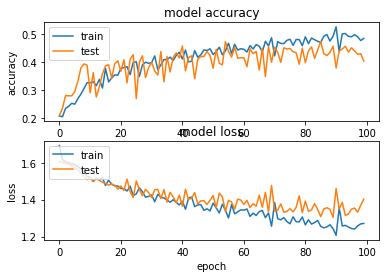

In [30]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import math
import cv2

%matplotlib inline
# dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'images/train'
validation_data_dir = 'images/validation'

# number of epochs to train top model
epochs = 20
# batch size used by flow_from_directory and predict_generator
batch_size = 800

# Has to be done only once.

#def save_bottleneck_features():
    # build the VGG16 network
#    model = applications.VGG16(include_top=False, weights='imagenet')

#    datagen = ImageDataGenerator(rescale=1. / 255)

#    generator = datagen.flow_from_directory(
#        train_data_dir,
#        target_size=(img_width, img_height),
#        batch_size=batch_size,
#        class_mode=None,
#        shuffle=False)

#    print(len(generator.filenames))
#    print(generator.class_indices)
#    print(len(generator.class_indices))

#    nb_train_samples = len(generator.filenames)
#    num_classes = len(generator.class_indices)

#    predict_size_train = int(math.ceil(nb_train_samples / batch_size))

#    bottleneck_features_train = model.predict_generator(
#        generator, predict_size_train)

#    np.save('bottleneck_features_train.npy', bottleneck_features_train)
#    generator = datagen.flow_from_directory(
#        validation_data_dir,
#        target_size=(img_width, img_height),
#        batch_size=batch_size,
#        class_mode=None,
#        shuffle=False)

#    nb_validation_samples = len(generator.filenames)

#    predict_size_validation = int(
#        math.ceil(nb_validation_samples / batch_size))

#    bottleneck_features_validation = model.predict_generator(
#        generator, predict_size_validation)

#    np.save('bottleneck_features_validation.npy',
#            bottleneck_features_validation)


#save_bottlebeck_features()
def train_top_model():
    datagen_top = ImageDataGenerator(rescale=1. / 255)
    generator_top = datagen_top.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    nb_train_samples = len(generator_top.filenames)
    num_classes = len(generator_top.class_indices)

    # save the class indices to use use later in predictions
    np.save('class_indices.npy', generator_top.class_indices)

    # load the bottleneck features saved earlier
    train_data = np.load('bottleneck_features_train.npy')

    # get the class lebels for the training data, in the original order
    train_labels = generator_top.classes
    
    # convert the training labels to categorical vectors
    train_labels = to_categorical(train_labels, num_classes=num_classes)

    generator_top = datagen_top.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    nb_validation_samples = len(generator_top.filenames)

    validation_data = np.load('bottleneck_features_validation.npy')

    validation_labels = generator_top.classes
    validation_labels = to_categorical(
        validation_labels, num_classes=num_classes)

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_data, train_labels,
                        epochs=100,
                        batch_size=1600,
                        validation_data=(validation_data, validation_labels))

    model.save_weights(top_model_weights_path)

    (eval_loss, eval_accuracy) = model.evaluate(
            validation_data, validation_labels, batch_size=batch_size, verbose=1)

    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
    print("[INFO] Loss: {}".format(eval_loss))

    plt.figure(1)

    # summarize history for accuracy

    plt.subplot(211)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # summarize history for loss

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

train_top_model()


Around 45% accuracy. Restricted by limitations of a CPU. The method could have achieved much better results if we could add more and more layers but that takes a toll on CPU. The code above (bottleneck part took around 3 hrs to run just on 4000 images...

Now lets go through the test images one by one and see what results we get on the test image

In [31]:
import os
dict = {}
for root,dirs,files in os.walk("./images/test/",topdown = False):
    folder_name = ''
    for name in dirs:
        for root1,dirs1,files1 in os.walk(os.path.join(root,name)):
            for names in files1:
                if name in dict.keys():
                    dict[name].append(names)
                else:
                    dict[name]=[names]

In [32]:
#just to remind which number represents which class
indices = np.load('class_indices.npy')

In [33]:
# The predict function. It loads the class indices saved in earlier steps. Creates a framework. Adds a layer to make
# the output a sigmoid layer and predicts the answers for the image
def predict(image_path,actual_output):
    # load the class_indices saved in the earlier step
    class_dictionary = np.load('class_indices.npy').item()

    num_classes = len(class_dictionary)   

    orig = cv2.imread(image_path)

    #print("[INFO] loading and preprocessing image...")
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)

    # important! otherwise the predictions will be '0'
    image = image / 255

    image = np.expand_dims(image, axis=0)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    # get the bottleneck prediction from the pre-trained VGG16 model
    bottleneck_prediction = model.predict(image)

    # build top model
    model = Sequential()
    model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid'))

    model.load_weights(top_model_weights_path)

    # use the bottleneck prediction on the top model to get the final
    # classification
    class_predicted = model.predict_classes(bottleneck_prediction)

    probabilities = model.predict_proba(bottleneck_prediction)
    
    #print(probabilities)

    inID = class_predicted[0]

    inv_map = {v: k for k, v in class_dictionary.items()}

    label = inv_map[inID]

    # get the prediction label
    # print("Image ID: {}, Predicted: {}, Actual: {}".format(inID, label, actual_output))
    
    
    
    return probabilities,label



Now let us analyse the accuracies obtained in case of Top1, Top2 and Top3 Genres. The original dataset had around 62000 images with 31 categories and 2000 images for each categories. Due to space constraints we had to reduce it to 5 categories with 1000 images each. 

The solution presented above is as generic as possible and with some minor tweaks can be extended to the original dataset as well. Lets analyse the accuracies now. Other Pretrained Models like ResNet50, Xception and VGG19 also exist and implemening and evaluating them would give us the best results. Ensembles of these methods can also be tried but currently we are limited by processing power

In [59]:
count = 0
top={}
top1 = 0
top2 = 0
top3 = 0
indices = {'Arts & Photography': 0, 'Cookbooks, Food & Wine': 1, 'History': 2, 'Law': 3, 'Science & Math': 4}
for i in dict.keys():
    for j in dict[i]:
        probabilities,label = predict('./images/test/'+i+'/'+j,i)
        val=indices[i]
        ans = probabilities[0][val]
        greatest = 0
        sec_greatest = 0
        third_greatest = 0
        for k in probabilities[0]:
            if greatest < k:
                greatest = k
        for k in probabilities[0]:
            if sec_greatest < k and k!=greatest:
                sec_greatest = k
        for k in probabilities[0]:
            if third_greatest < k and k!=greatest and k!=sec_greatest:
                third_greatest = k
        if ans == greatest:
            top1+=1
            top2+=1
            top3+=1
        elif ans==sec_greatest:
            top2+=1
            top3+=1
        elif ans==third_greatest:
            top3+=1

1/1 [==============================] - 1s


1/1 [==============================] - 0s


In [61]:
print("Top 1 accuracy " + str(top1))
print("Top 2 accuracy " + str(top2))
print("Top 3 accuracy "  + str(top3))

Top 1 accuracy 35
Top 2 accuracy 60
Top 3 accuracy 83
